<a href="https://colab.research.google.com/github/medha130101/ML-Lab/blob/main/Experiment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/spam_ham_dataset.csv")
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [2]:
df.drop("Unnamed: 0",axis = 1, inplace = True)
df.isnull()

,label,text,label_num
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
5166,False,False,False
5167,False,False,False
5168,False,False,False
5169,False,False,False


In [4]:
df.drop('label',axis = 1, inplace = True)
df

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


In [5]:
ham = df[df['label_num'] == 1]
ham

,text,label_num
3,"Subject: photoshop , windows , office . cheap ...",1
7,Subject: looking for medication ? we ` re the ...,1
10,Subject: vocable % rnd - word asceticism\r\nvc...,1
11,Subject: report 01405 !\r\nwffur attion brom e...,1
13,Subject: vic . odin n ^ ow\r\nberne hotbox car...,1
...,...,...
5159,Subject: pictures\r\nstreamlined denizen ajar ...,1
5161,Subject: penny stocks are about timing\r\nnoma...,1
5162,Subject: anomaly boys from 3881\r\nuosda apapr...,1
5164,Subject: slutty milf wants to meet you\r\ntake...,1


In [6]:
df['Length'] = df['text'].apply(len)

In [7]:
df

,text,label_num,Length
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,"Subject: photoshop , windows , office . cheap ...",1,414
4,Subject: re : indian springs\r\nthis deal is t...,0,336
...,...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0,534
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1114
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0,402
5169,Subject: industrial worksheets for august 2000...,0,573


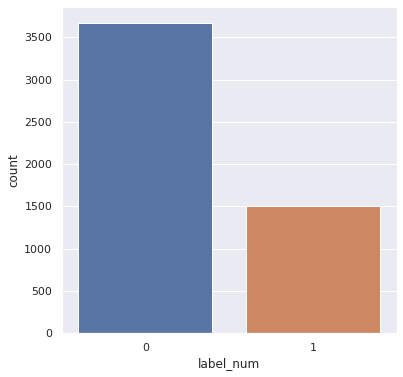

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (6, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = df, x = 'label_num');

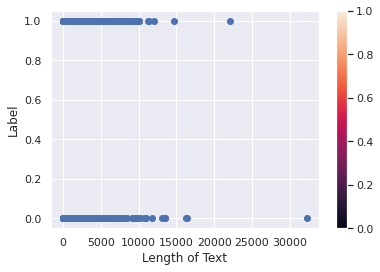

In [13]:
plt.scatter(df['Length'], df['label_num'])
plt.ylabel('Label')
plt.xlabel('Length of Text')
plt.colorbar()
plt.show()

In [20]:
import re
import nltk  
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
import re
import nltk  
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
corpus = []
length = len(df)
for i in range(0,length):
    text = re.sub("[^a-zA-Z0-9]"," ",df["text"][i])
    text = text.lower()
    text = text.split()
    pe = PorterStemmer()
    stopword = stopwords.words("english")
    text = [pe.stem(word) for word in text if not word in set(stopword)]
    text = " ".join(text)
    corpus.append(text)
print(corpus[0])

subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos


In [22]:
all_mails = ''
for i in corpus:
    all_mails=all_mails+i

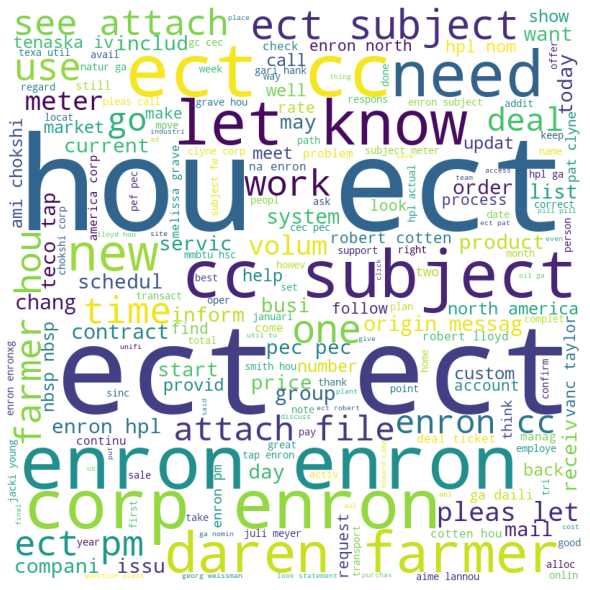

In [24]:
from wordcloud import WordCloud, STOPWORDS


wordcloud = WordCloud(width = 800, height = 800,background_color ='white',
                        min_font_size = 10).generate(all_mails)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [26]:
def mailprocess(text):
  text = text.replace('\r','')
  text = text.replace('\n','')
  text = text.replace('#','')
  text = text.replace("Subject:","")
  text = text.replace("we 're","we are")
  text = text.replace("ect","etc")
  text = text.replace("you 're","you are")
  return text

In [27]:
df['clean_text'] = df['text'].map(mailprocess)
df

,text,label_num,Length,clean_text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,enron methanol ; meter : 988291this is a fol...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,"hpl nom for january 9 , 2001( see attached fi..."
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,"neon retreatho ho ho , we ' re around to that..."
3,"Subject: photoshop , windows , office . cheap ...",1,414,"photoshop , windows , office . cheap . main t..."
4,Subject: re : indian springs\r\nthis deal is t...,0,336,re : indian springsthis deal is to book the t...
...,...,...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0,534,put the 10 on the ftthe transport volumes dec...
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1114,3 / 4 / 2000 and following nomshpl can ' t ta...
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0,402,"calpine daily gas nomination>>julie , as i me..."
5169,Subject: industrial worksheets for august 2000...,0,573,industrial worksheets for august 2000 activit...


In [29]:
from sklearn.model_selection import train_test_split

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=35000)
X = cv.fit_transform(corpus).toarray()
y=df['label_num']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4136, 35000)
(1035, 35000)
(4136,)
(1035,)


In [41]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

model.fit(X_train, y_train)

y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)
print(cm,score*100)

[[716  16]
 [ 17 286]] 96.81159420289856


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       732
           1       0.95      0.94      0.95       303

    accuracy                           0.97      1035
   macro avg       0.96      0.96      0.96      1035
weighted avg       0.97      0.97      0.97      1035



In [47]:
def new_review(new_review):
    new_review = new_review
    new_review = re.sub('[^a-zA-Z]', ' ', new_review)
    new_review = new_review.lower()
    new_review = new_review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    new_review = [ps.stem(word) for word in new_review if not word in   set(all_stopwords)]
    new_review = ' '.join(new_review)
    new_corpus = [new_review]
    new_X_test = cv.transform(new_corpus).toarray()
    new_y_pred = model.predict(new_X_test)
    return new_y_pred
#new_review = new_review(str(input("Enter new review...")))
new_review = new_review("Avail latest discount offers.")
if new_review[0]==1:
  print("SPAM")
else :
  print("NOT SPAM")

SPAM


Text(0.5, 12.5, 'Predicted Label')

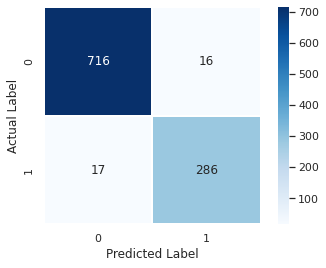

In [48]:
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(data = cm,linewidths=1.0,annot=True,square = True,cmap = "Blues",fmt='g')
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")